# Disruptive Stocks

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xbbg import blp

In [11]:
def GetRet(Liste, Start = "20150101", End = pd.to_datetime("today").strftime("%Y%m%d"), Returns = True):
    Res = blp.bdh(tickers= Liste,start_date = Start , end_date = End)
    Res.columns = [x[0] for x in Res.columns]
    Ret = (np.log(Res) - np.log(Res.shift(1))).iloc[1:,:]
    if Returns == True:
        Ret = Ret.T.mean()
    return Ret

def GetBench(Index, Start = "20150101", End = pd.to_datetime("today").strftime("%Y%m%d")):
    Res = blp.bdh(tickers= Index + " Index",start_date = Start , end_date = End)
    Ret = (np.log(Res) - np.log(Res.shift(1))).iloc[1:,:]
    Ret.columns = [Index]
    return Ret

def Plot(Ret):
    print("Sharpe", np.sqrt(252) * Ret.mean()/Ret.std())
    Ret = Ret + 1
    if type(Ret) == type(pd.Series(0)):
        Ret[0] = 100
    else:
        Ret.iloc[0,0] = 100
    plt.plot(Ret.cumprod())
    plt.axvline(x=pd.to_datetime("2020-05-27"), c="k")
    plt.show()
    return "Plot!"


In [12]:
Liste = ["TSLA US Equity","SQ US Equity","NVTA US Equity","CRSP US Equity","TWOU US Equity","ILMN US Equity","PRLB US Equity","Z US Equity","ROKU US Equity","NTLA US Equity","SSYS US Equity","EDIT US Equity","TREE US Equity","CGEN US Equity","SPLK US Equity","XLNX US Equity","NSTG US Equity","TER US Equity","MTLS US Equity","ADSK US Equity","PINS US Equity","PD US Equity","CERS US Equity","PSTG US Equity","VCYT US Equity","SYRS US Equity","IRDM US Equity","MCRB US Equity","ZS US Equity","XONE US Equity","ONVO US Equity","LC US Equity","TWST US Equity","SFIX US Equity", "PHR US Equity", "FVRR US Equity", "MDLA US Equity"]


In [15]:
Ret = GetRet(Liste, Start = "20150101", End = pd.to_datetime("today").strftime("%Y%m%d"), Returns = True)

Sharpe 0.2820612403661977


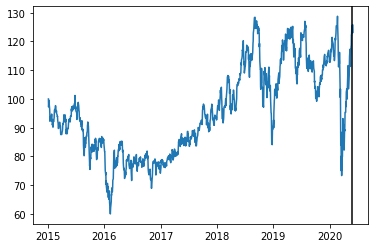

'Plot!'

In [16]:
Plot(Ret)